In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
#base_dir = "toy_eg_stage1_"#
base_dir = "proportional/toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
new_order = ['Naive', 1.0, 2.5, 5.0, 10.0, 'Tree val']
coverage_df = coverage_df[new_order]
coverage_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,0.666667,1.000000,1.000000,1.000000,1.000000,0.833333
1,0.833333,1.000000,1.000000,0.833333,0.800000,1.000000
2,0.666667,0.833333,0.666667,1.000000,0.833333,0.833333
3,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.800000,0.800000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
45,0.333333,0.833333,1.000000,1.000000,1.000000,0.666667
46,0.666667,1.000000,1.000000,1.000000,1.000000,0.833333
47,0.666667,1.000000,0.833333,0.833333,0.833333,0.833333
48,0.714286,1.000000,1.000000,1.000000,0.600000,1.000000


In [5]:

length_df = length_df[new_order]
length_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,6.579415,12.380969,8.060045,7.833582,7.308304,60.749166
1,6.579415,19.741019,8.358946,7.505941,6.765545,36.844095
2,6.579415,12.297046,8.889406,7.208502,7.211435,9.252830
3,6.579415,11.348718,7.802131,7.245182,7.270795,24.647254
4,6.579415,11.025368,8.229225,7.547516,7.156889,22.230015
...,...,...,...,...,...,...
45,6.579415,14.016511,9.023464,7.512186,7.373956,53.064086
46,6.579415,12.551823,8.607606,7.313033,6.885837,69.371795
47,6.579415,11.591923,7.903346,6.904391,6.902402,58.406027
48,6.579415,11.763056,8.052606,7.852477,7.044511,22.504188


In [6]:
MSE_df = MSE_df[new_order]
MSE_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,4.763445,5.099341,4.691955,4.867183,6.538500,4.763445
1,4.268548,4.594842,4.786014,4.746710,5.226419,4.268548
2,4.806279,4.720261,4.637741,5.440774,5.512090,4.806279
3,5.451172,5.251753,5.195973,5.636161,4.866396,5.451172
4,3.815103,3.949075,4.084792,4.031705,5.371759,3.815103
...,...,...,...,...,...,...
45,4.145074,4.176868,4.364989,5.121384,5.025296,4.145074
46,4.089269,4.246645,3.893309,4.325186,4.419282,4.089269
47,4.259059,4.496030,4.541523,4.651673,4.743682,4.259059
48,4.408939,4.809643,4.674489,4.630409,4.901096,4.408939


In [7]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        showmeans = False if metric == "Coverage" else True
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False, 
                    showmeans=showmeans)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        new_label = [x if x != "Naive" else r"Naïve" for x in col_names]
        axes[i].set_xticklabels(new_label)
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10,)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,8)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=1)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_94781/1816379274.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_94781/1816379274.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_94781/1816379274.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)


Coverage :
 Naive          0.665545
RRT(1)         0.890053
RRT(2.5)       0.880411
RRT(5)         0.898937
RRT(10)        0.886423
Tree-values    0.897127
dtype: float64
Length :
 Naive           6.579415
RRT(1)         12.955507
RRT(2.5)        8.522311
RRT(5)          7.461564
RRT(10)         7.066167
Tree-values    96.798961
dtype: float64
MSE :
 Naive          4.689223
RRT(1)         4.716606
RRT(2.5)       4.873340
RRT(5)         5.107650
RRT(10)        5.428730
Tree-values    4.689223
dtype: float64


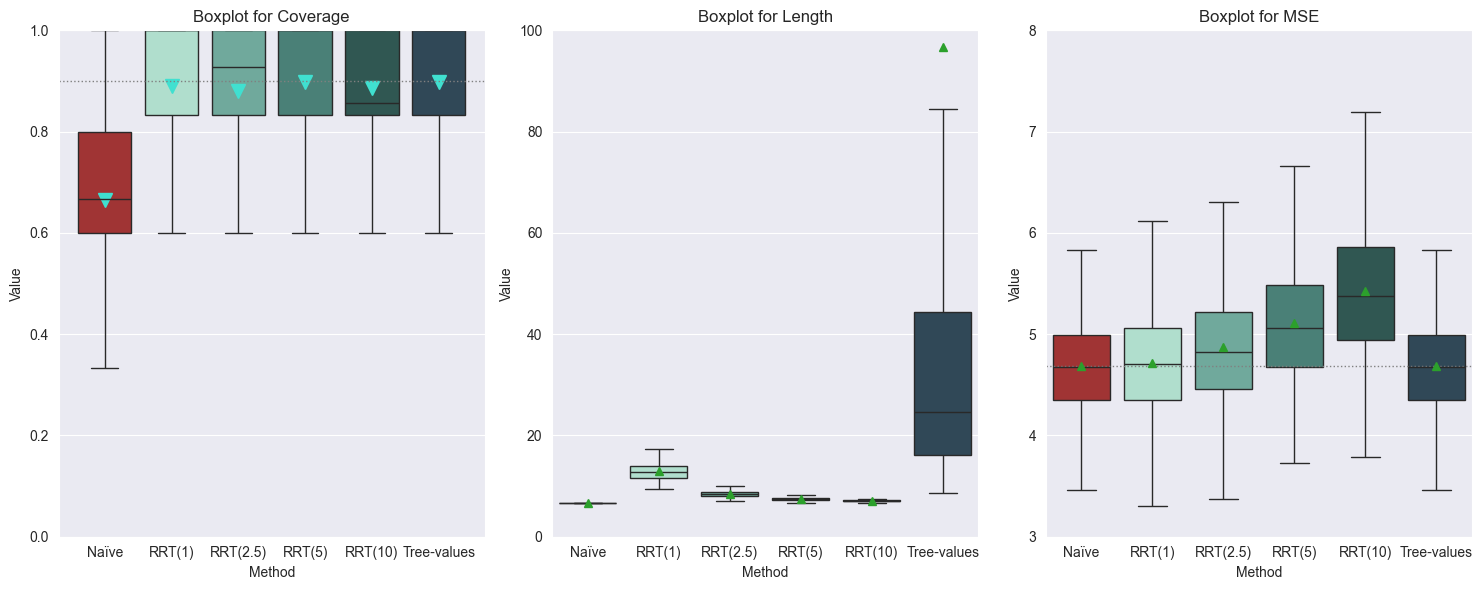

In [8]:

boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=100,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["Naive", "RRT(1)", "RRT(2.5)", "RRT(5)", "RRT(10)",
                    "Tree-values"], 
         palette=["#B22222", "#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D"])